In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from utils.network import GetArchivedFile
g=GetArchivedFile(shortcut="KGH")
df=g.get_data_frame()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date']).astype(int)/ 10**9

<http.client.HTTPResponse object at 0x7f221eb71b70> <class 'http.client.HTTPResponse'>


# LINEAR REGRESSION

In [2]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

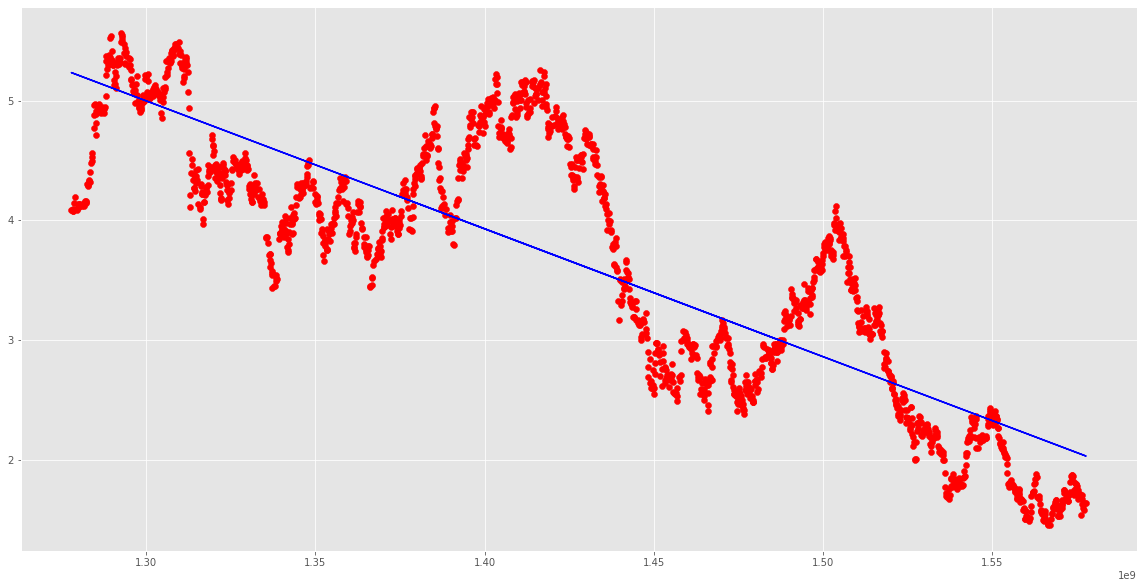

In [5]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")

# POLYNOMIAL REGRESSION

In [2]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

# X_prev = X[:400]
# y_prev = y[:400]

# X_next = X[400:]
# y_next = y[400:]
# X.size, y.size, X_prev.size, y_prev.size, X_next.size, y_next.size

### First do transform then split into "past" and "future" sets

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X_prev, sc_y_prev = StandardScaler(), StandardScaler()
sc_X_next, sc_y_next = StandardScaler(), StandardScaler()

# X_prev, y_prev = sc_X_prev.fit_transform(X_prev), sc_y_prev.fit_transform(y_prev.reshape(-1, 1))
# X_next, y_next = sc_X_next.fit_transform(X_next), sc_y_next.fit_transform(y_next.reshape(-1, 1))

sc_X, sc_y = StandardScaler(), StandardScaler()
X, y = sc_X.fit_transform(X), sc_y.fit_transform(y.reshape(-1, 1))
X_prev = X[5000:5500]
y_prev = y[5000:5500]
X_next = X[5500:]
y_next = y[5500:]

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prev, y_prev)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly_prev = poly_reg.fit_transform(X_prev)
X_poly_next = poly_reg.fit_transform(X_next)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_prev, y_prev)
y_next.size, len(y_next)

(123, 123)

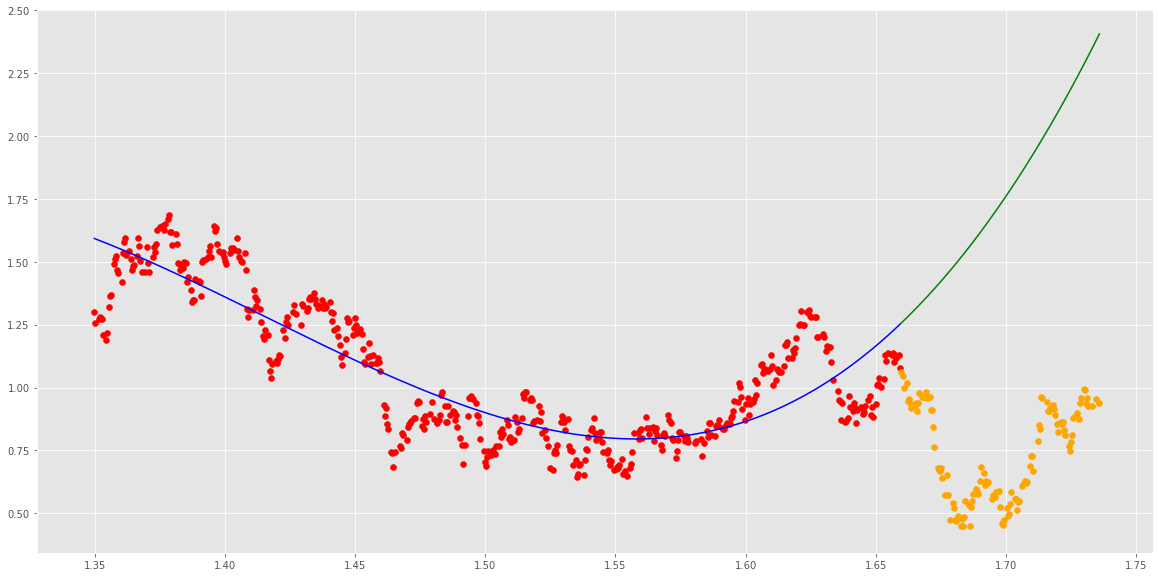

In [13]:
plt.scatter(X_prev, y_prev, color="red")
plt.scatter(X_next, y_next, color="orange")
plt.plot(X_prev, lin_reg_2.predict(X_poly_prev), color="blue")
plt.plot(X_next, lin_reg_2.predict(X_poly_next), color="green")

## transform example - back and forth

In [9]:
y_next[50:], y[450:], sc_y_next.inverse_transform(y_next[50:])

(array([[-0.59681757]]), array([28.68]), array([[28.68]]))

# SVR

In [10]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

# X_prev = X[:400]
# y_prev = y[:400]

# X_next = X[400:]
# y_next = y[400:]

from sklearn.preprocessing import StandardScaler

sc_X, sc_y = StandardScaler(), StandardScaler()
X, y = sc_X.fit_transform(X), sc_y.fit_transform(y.reshape(-1, 1))

X_prev = X[5000:5500]
y_prev = y[5000:5500]
X_next = X[5500:]
y_next = y[5500:]


In [11]:
from sklearn.svm import SVR

_svr = SVR(kernel='rbf')
_svr.fit(X_prev, y_prev.ravel() )
X.size, y.size, X_prev.size, y_prev.size, X_next.size, y_next.size

(5623, 5623, 500, 500, 123, 123)

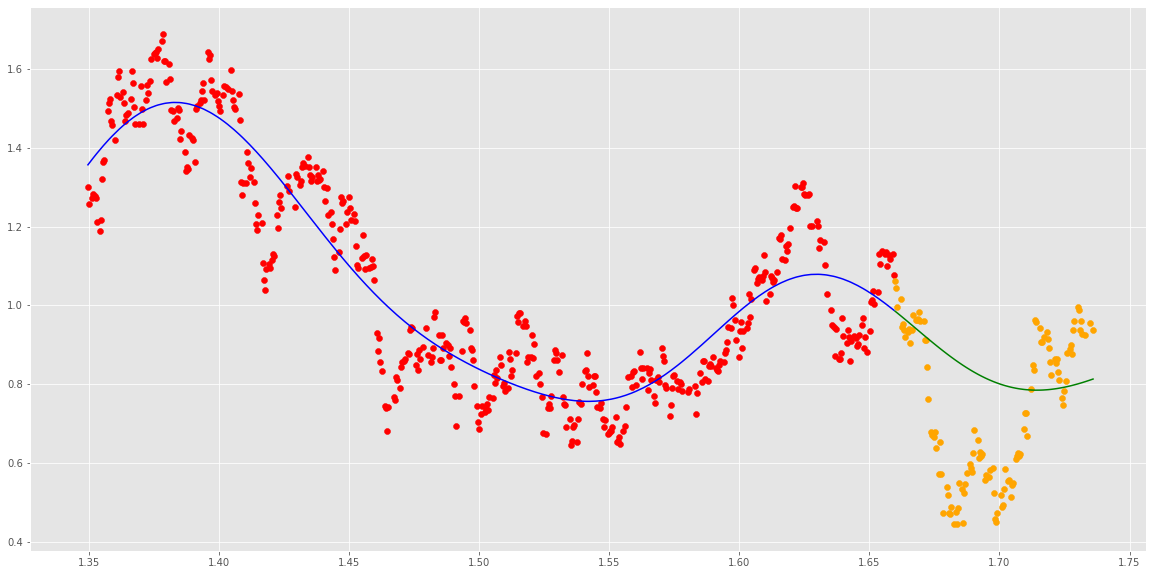

In [13]:
X.size, y.size, X_prev.size, y_prev.size, X_next.size, y_next.size

plt.scatter(X_prev, y_prev, color="red")
plt.scatter(X_next, y_next, color="orange")
plt.plot(X_prev, _svr.predict(X_prev), color="blue")
plt.plot(X_next, _svr.predict(X_next), color="green")

In [13]:
X.size, y.size, X_prev.size, y_prev.size, X_next.size, y_next.size

(1751, 1751, 700, 700, 51, 51)